Dataset Link: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [2]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [7]:
import seaborn as sns

In [1]:
!wget -P './data/' 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet'
!wget -P './data/' 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet'

--2024-05-17 21:48:25--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.163, 18.239.38.83, 18.239.38.147, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.38.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47673370 (45M) [application/x-www-form-urlencoded]
Saving to: ‘./data/yellow_tripdata_2023-01.parquet’

yellow_tripdata_202 100%[===================>]  45.46M  87.6MB/s    in 0.5s    

2024-05-17 21:48:26 (87.6 MB/s) - ‘./data/yellow_tripdata_2023-01.parquet’ saved [47673370/47673370]

--2024-05-17 21:48:27--  https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.239.38.181, 18.239.38.163, 18.239.38.147, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.239.38.181|:4

In [3]:
filename_train ='./data/yellow_tripdata_2023-01.parquet'
df = pd.read_parquet(filename_train)

In [6]:
#Q1
print("number of columns in the dataset: "+str(len(df.columns)))

#Q2
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

df['duration']=df.tpep_dropoff_datetime - df.tpep_pickup_datetime 

df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
print("duration std "+str(df.duration.std()))

number of columns in the dataset: 19
duration std 42.59435124195458


/tmp/ipykernel_7798/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

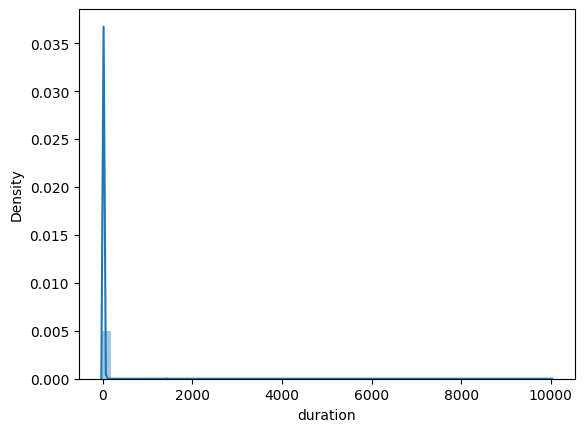

In [8]:
sns.distplot(df.duration)

/tmp/ipykernel_7798/1513214178.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_remove_outliers.duration)


<Axes: xlabel='duration', ylabel='Density'>

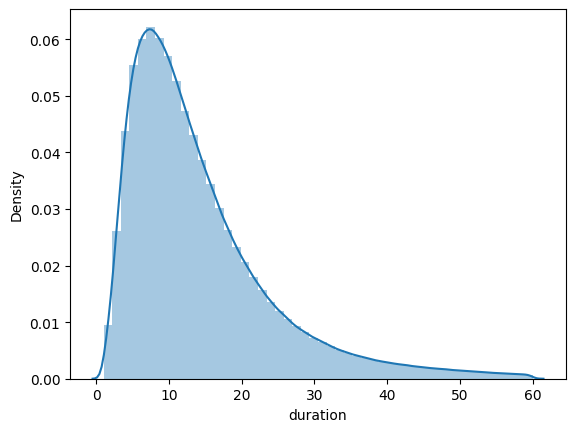

In [11]:
df_remove_outliers= df[((df.duration>=1) &(df.duration<=60))]
sns.distplot(df_remove_outliers.duration)

In [12]:
#Q3
before= df.shape[0]
print("before removing outliers: "+str(before ))
after = df_remove_outliers.shape[0]
print("after removing outliers: "+ str(after))
print("ratio: " + str(after/before))

before removing outliers: 3066766
after removing outliers: 3009173
ratio: 0.9812202822125979


In [27]:
def read_df(filename):
    df = pd.read_parquet(filename)
    print("number of columns in the dataset: "+str(len(df.columns)))
    df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)

    df['duration']=df.tpep_dropoff_datetime - df.tpep_pickup_datetime 

    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    print("duration std "+str(df.duration.std()))
    before= df.shape[0]
    print("before removing outliers: "+str(before ))
    df= df[((df.duration>=1) &(df.duration<=60))]
    after = df.shape[0]
    print("after removing outliers: "+ str(after))
    print("ratio: " + str(after/before))
    categorical=['PULocationID', 'DOLocationID']

    df[categorical]=df[categorical].astype(str)
    return df

In [28]:
filename_train ='./data/yellow_tripdata_2022-01.parquet'
df_train = read_df(filename_train)

number of columns in the dataset: 19
duration std 46.44530513776499
before removing outliers: 2463931
after removing outliers: 2421440
ratio: 0.9827547930522406


In [29]:
filename_val = './data/yellow_tripdata_2022-02.parquet'
df_val = read_df(filename_val)

number of columns in the dataset: 19
duration std 47.26394076781901
before removing outliers: 2979431
after removing outliers: 2918187
ratio: 0.979444397269143


In [19]:
dv = DictVectorizer()

categorical= ['PULocationID', 'DOLocationID']

train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [22]:
y_train = df_train['duration'].values

In [25]:
val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_val = df_val['duration'].values

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

6.986190135969309

In [21]:
len(dv.feature_names_)

515

In [26]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.786389386061076